# Linear Regression: A Comprehensive Guide

## Basic Concept
Linear regression is a foundational statistical and machine learning technique that models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data.

## Types
1. **Simple Linear Regression**
   - One independent variable (X) and one dependent variable (Y)
   - Equation: Y = β₀ + β₁X + ε
     - β₀: Y-intercept
     - β₁: Slope
     - ε: Error term

2. **Multiple Linear Regression**
   - Multiple independent variables
   - Equation: Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε

## Key Assumptions
1. **Linearity**: Relationship between X and Y is linear
2. **Independence**: Observations are independent
3. **Homoscedasticity**: Constant variance in residuals
4. **Normality**: Residuals follow normal distribution
5. **No Multicollinearity**: Independent variables aren't highly correlated

## Model Evaluation Metrics
1. **R-squared (R²)**
   - Measures proportion of variance explained
   - Range: 0 to 1 (higher is better)

2. **Adjusted R-squared**
   - Accounts for number of predictors
   - Prevents overfitting

3. **Mean Squared Error (MSE)**
   - Average squared differences between predictions and actual values

4. **Root Mean Squared Error (RMSE)**
   - Square root of MSE
   - In same units as dependent variable

## Implementation Steps
1. Data Collection
2. Data Preprocessing
   - Handle missing values
   - Feature scaling
   - Outlier detection
3. Split data (training/testing)
4. Model training
5. Model evaluation
6. Model deployment

## Advantages
- Simple to understand and implement
- Easily interpretable
- Computationally efficient
- Provides feature importance

## Limitations
- Assumes linear relationship
- Sensitive to outliers
- Can't capture non-linear patterns
- Assumes independence of features

## Common Applications
1. Sales forecasting
2. Risk assessment
3. Price prediction
4. Scientific research
5. Economic analysis


# Method of Least Squares in Linear Regression

To determine the best-fit line in linear regression, the **method of least squares** minimizes the sum of the squared differences between the observed values and the values predicted by the linear model. Here's the process:

1. **Define the linear model**: The model has the form:
   
   $y = \beta_0 + \beta_1 x + \epsilon$
   
   where $y$ is the dependent variable, $x$ is the independent variable, $\beta_0$ is the intercept, $\beta_1$ is the slope, and $\epsilon$ is the error term.

2. **Calculate the squared residuals**: For each observation $i$ in your data set, calculate the residual $\epsilon_i = y_i - (\beta_0 + \beta_1 x_i)$, then square it to get $\epsilon_i^2$.

3. **Minimize the sum of squared residuals**:
   
   $\text{SSE} = \sum_{i=1}^{n} \left(y_i - (\beta_0 + \beta_1 x_i)\right)^2$
   
   where $n$ is the number of data points. The goal is to find the values of $\beta_0$ and $\beta_1$ that minimize this sum.

4. **Solve for $\beta_0$ and $\beta_1$** using calculus:
   - The slope $\beta_1$ is calculated as:
     
     $\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$
   
   - The intercept $\beta_0$ is:
     
     $\beta_0 = \bar{y} - \beta_1 \bar{x}$
   
   where $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$ respectively.

5. **Interpret the regression line**: Once $\beta_0$ and $\beta_1$ are determined, the best-fit line $y = \beta_0 + \beta_1 x$ can be used to predict $y$-values for given $x$-values.

Would you like me to explain any part of this content in more detail?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')


In [3]:
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 


In [4]:

# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 

type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [5]:
# Metadata and variable info 
print(concrete_compressive_strength.metadata)  
print(concrete_compressive_strength.variables) 

{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 383, 'type': 'NATIVE', 'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'venue': 'C

In [6]:
entire_data = pd.concat([X,y], axis=1)
entire_data


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


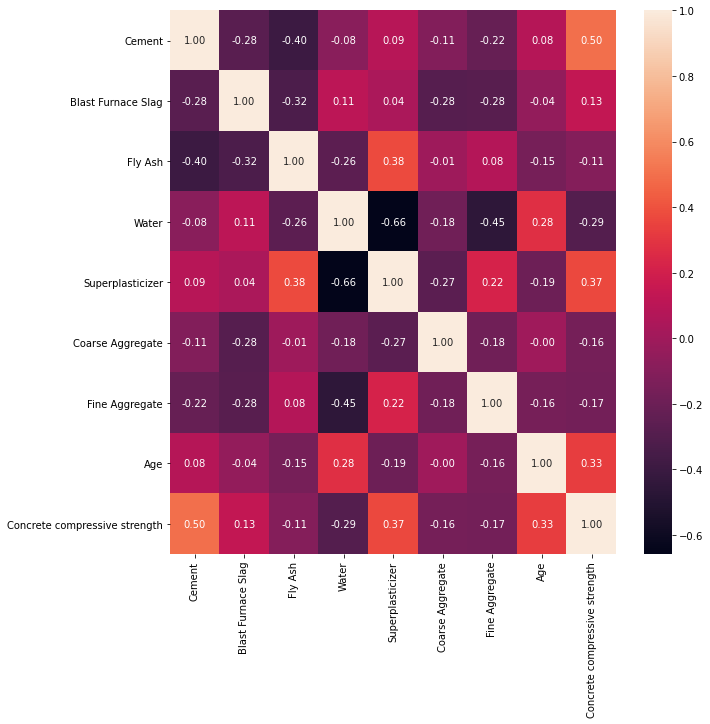

In [7]:
entire_data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(entire_data.corr(), annot=True, fmt=".2f")
plt.show()


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, y_train.shape

((824, 8), (824, 1))

In [9]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [10]:
lr.intercept_ , lr.coef_

(array([-30.56675576]),
 array([[ 0.11923772,  0.10881555,  0.0911555 , -0.14527714,  0.31551104,
          0.02225423,  0.02248514,  0.11520355]]))

In [11]:
y_pred = lr.predict(X_test) 
y_pred

array([[39.16168311],
       [14.61985573],
       [61.44006681],
       [53.77704184],
       [24.66843056],
       [53.44824826],
       [46.03635103],
       [27.0142886 ],
       [52.97935681],
       [37.7669688 ],
       [16.78225173],
       [39.38067954],
       [29.58730029],
       [35.96292876],
       [47.58040332],
       [56.53181108],
       [35.48381341],
       [29.5710143 ],
       [48.31448876],
       [35.09926523],
       [53.50039223],
       [32.6381569 ],
       [32.78602889],
       [47.85367457],
       [23.52304214],
       [23.49824614],
       [69.33646719],
       [26.46234841],
       [56.53181108],
       [48.29138728],
       [18.94539881],
       [36.73148524],
       [17.69801487],
       [19.85998727],
       [24.52854945],
       [15.47194289],
       [52.98743408],
       [27.88380095],
       [27.4939795 ],
       [26.11003546],
       [52.37737924],
       [30.70653948],
       [25.82766787],
       [35.35266432],
       [53.49326786],
       [53

In [12]:
r2_score(y_test, y_pred)    

0.6369606518338298

### Polynomial Features

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False).set_output(transform='pandas')
X_ploy_trn = poly.fit_transform(X_train)

lr  = LinearRegression()
lr.fit(X_ploy_trn, y_train)
y_pred = lr.predict(X_ploy_trn)
r2_score(y_train, y_pred)

0.8164466687341019

In [14]:

poly = PolynomialFeatures(degree=3, include_bias=False).set_output(transform='pandas')
X_ploy_trn = poly.fit_transform(X_train)

lr  = LinearRegression()
lr.fit(X_ploy_trn, y_train)
y_pred = lr.predict(X_ploy_trn)
r2_score(y_train, y_pred)

0.9321177548512414

In [16]:

poly = PolynomialFeatures(degree=4, include_bias=False).set_output(transform='pandas')
X_ploy_trn = poly.fit_transform(X_train)

lr  = LinearRegression()
lr.fit(X_ploy_trn, y_train)
y_pred = lr.predict(X_ploy_trn)
r2_score(y_train, y_pred)

0.9828707093580279